In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [52]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
sns.set(rc = {'figure.figsize':(15,8)})

In [53]:
data = pd.read_csv('./Data/bank_mkt_train.csv')

In [54]:
data.head()

,client_id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
0,29925,42.0,management,married,basic.9y,no,no,no,cellular,jul,thu,1.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
1,37529,35.0,unemployed,married,university.degree,no,yes,no,telephone,jun,mon,4.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,0
2,2757,44.0,technician,married,basic.9y,no,yes,yes,cellular,may,mon,1.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.264,5099.1,0
3,9642,45.0,services,married,high.school,no,yes,no,cellular,apr,tue,1.0,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.453,5099.1,0
4,14183,45.0,unknown,married,unknown,unknown,unknown,unknown,telephone,may,wed,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


# Visualizing columns to gain insights

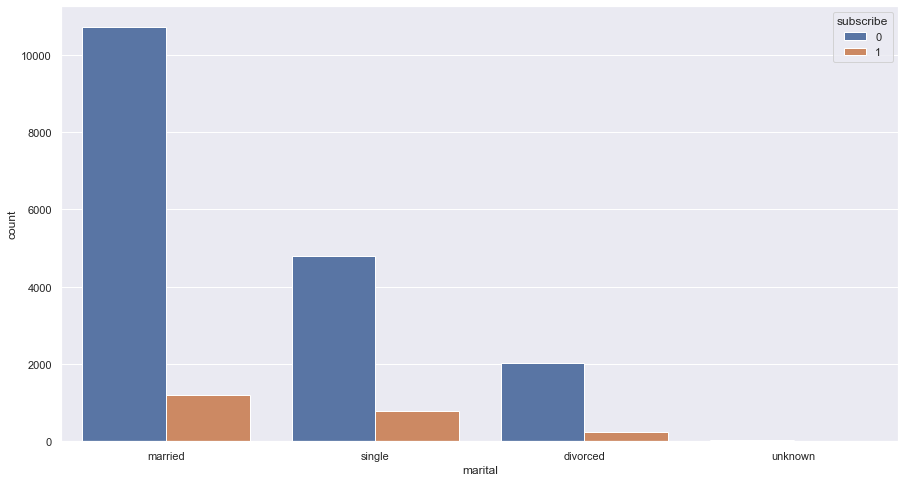

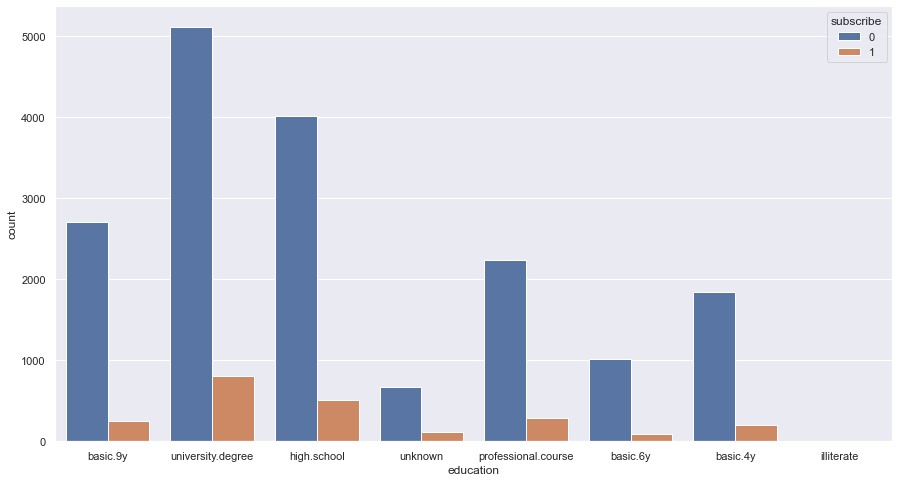

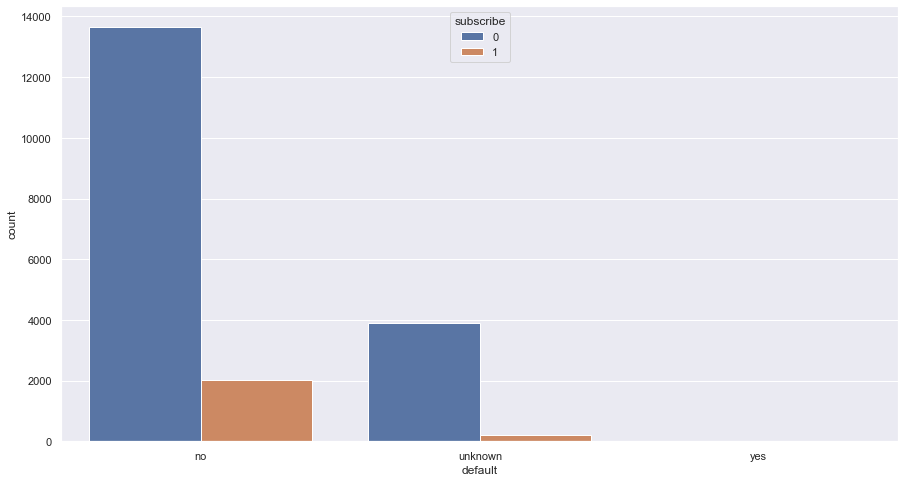

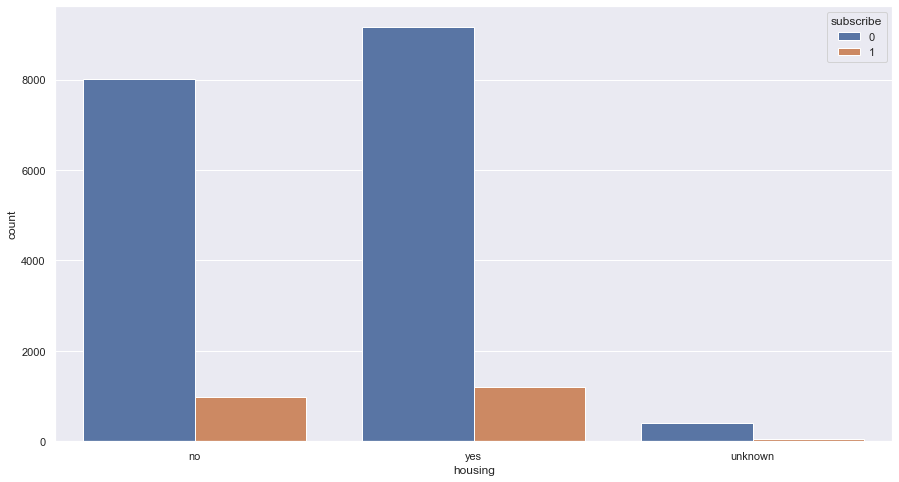

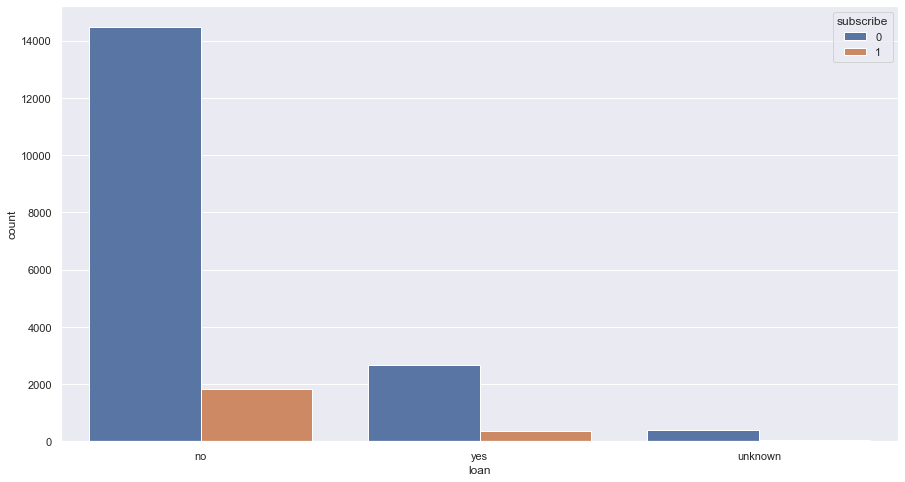

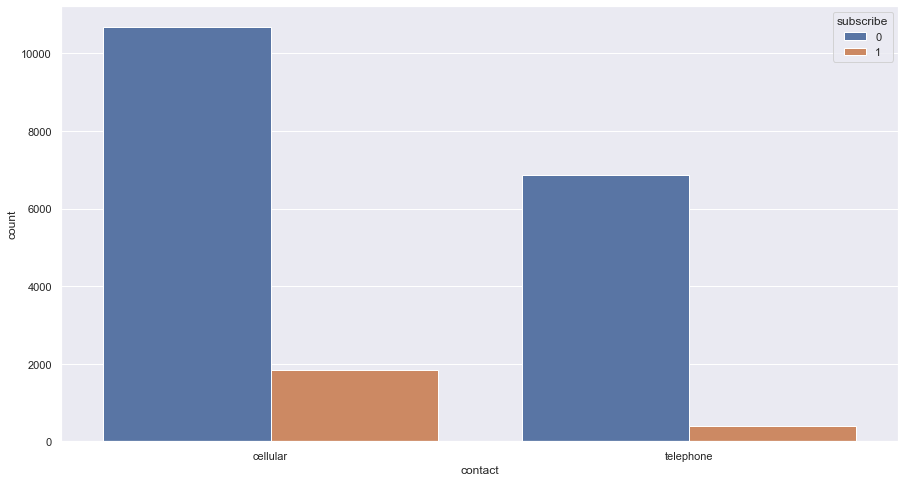

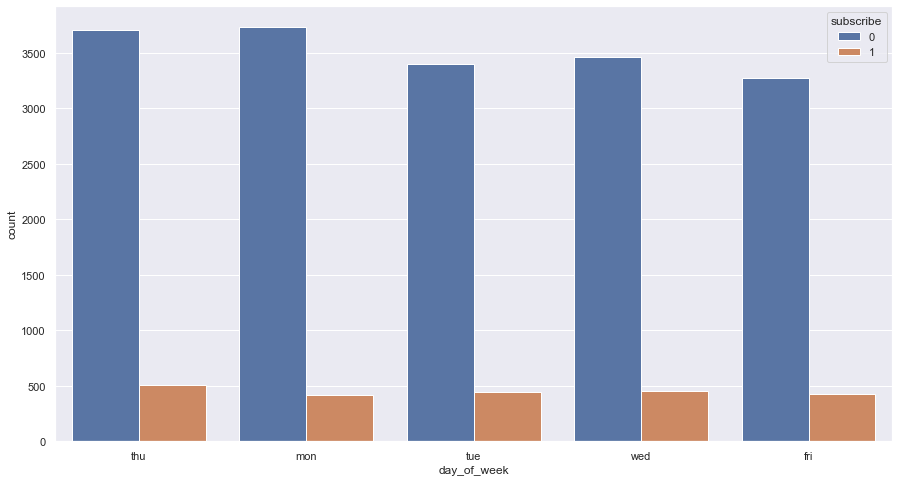

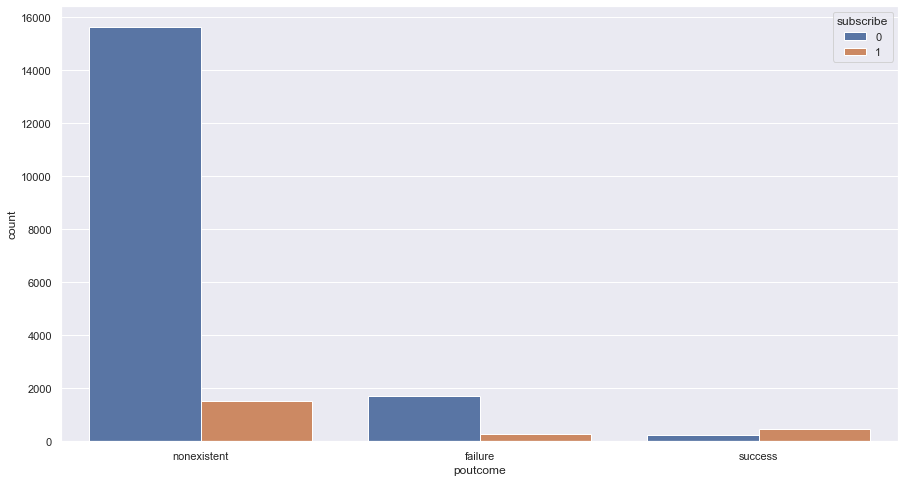

In [55]:
for col in data.columns:
    if (data[col].dtype == 'object'):
        if(data[col].nunique() < 10):
            sns.countplot(x=col, hue="subscribe", data=data)
            plt.show()


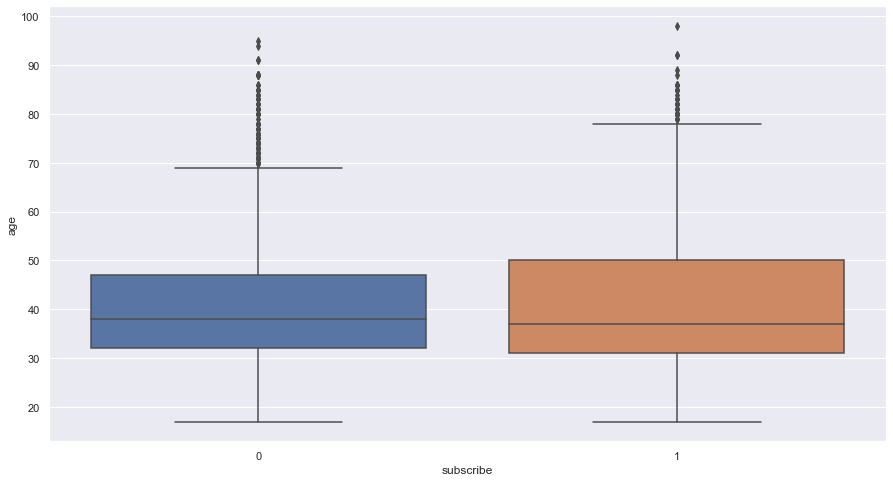

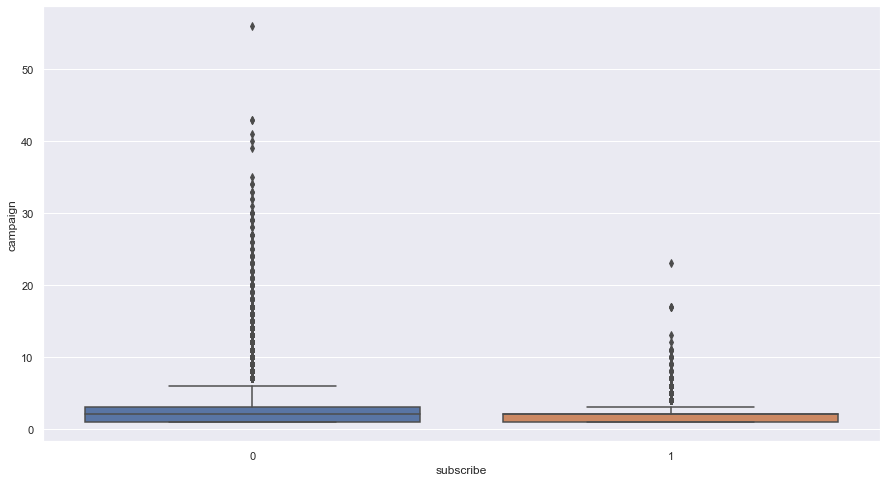

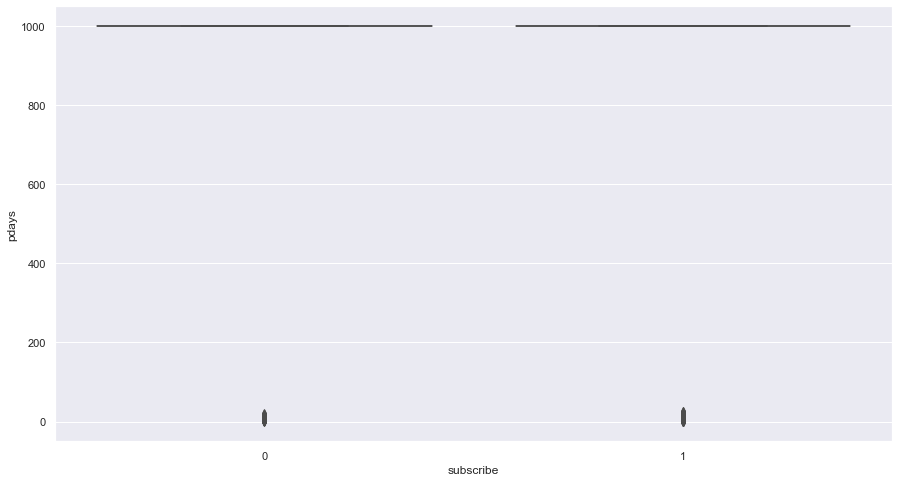

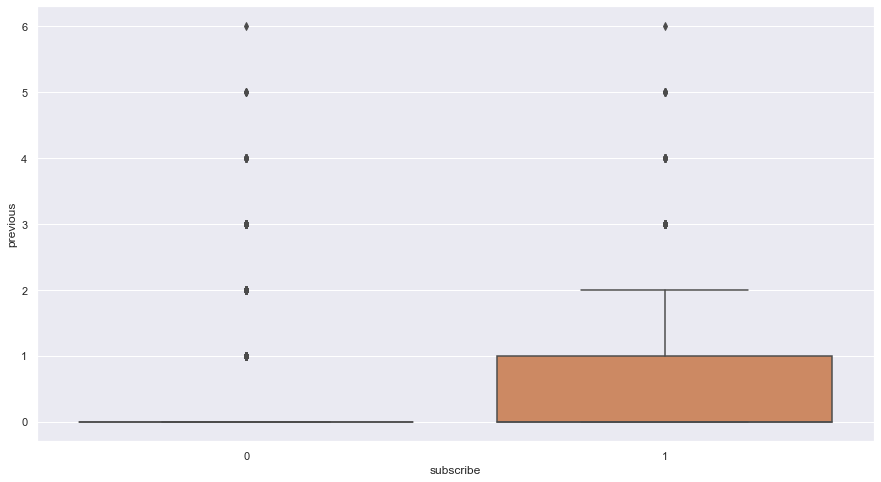

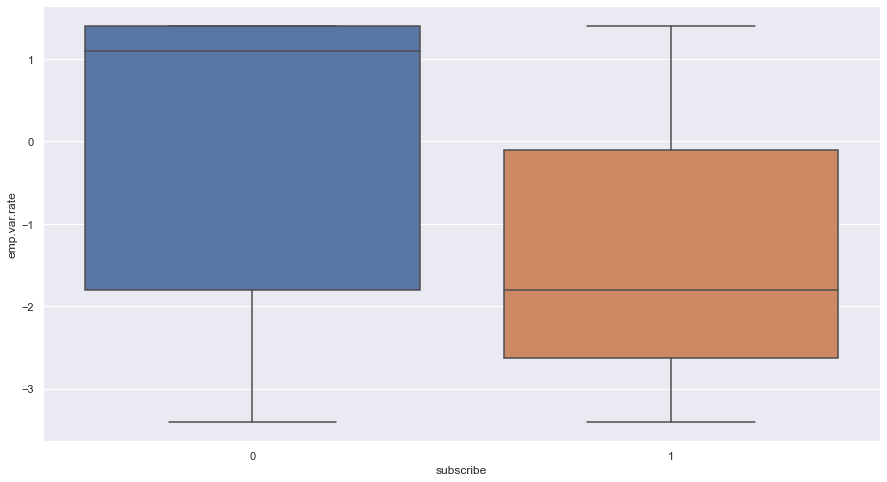

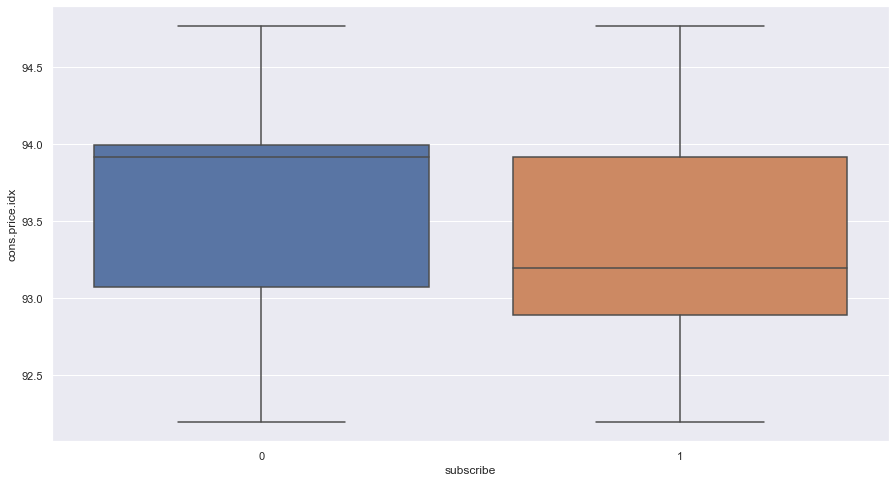

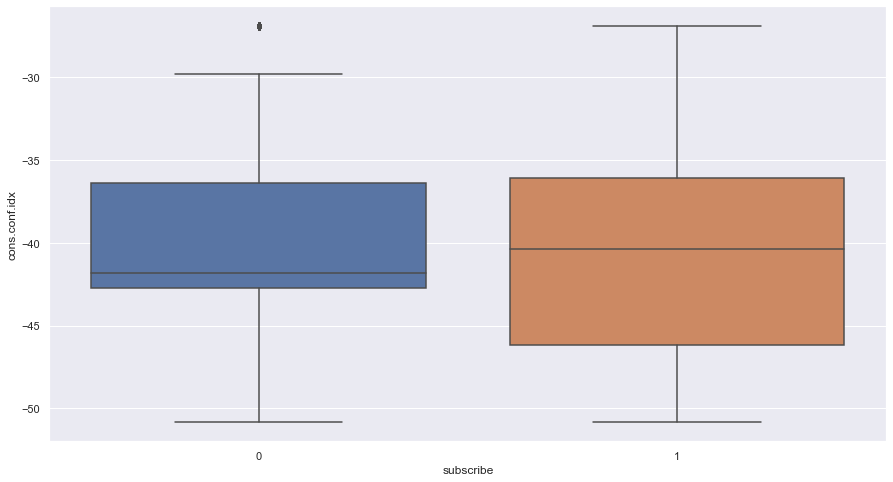

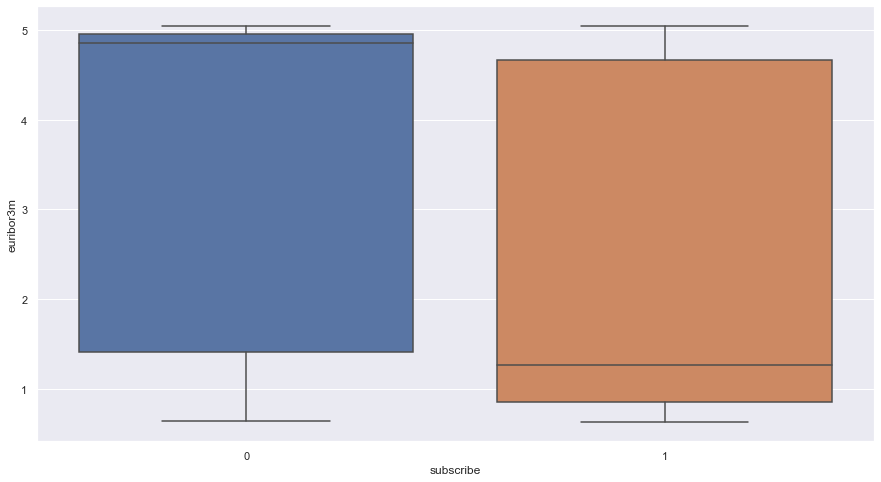

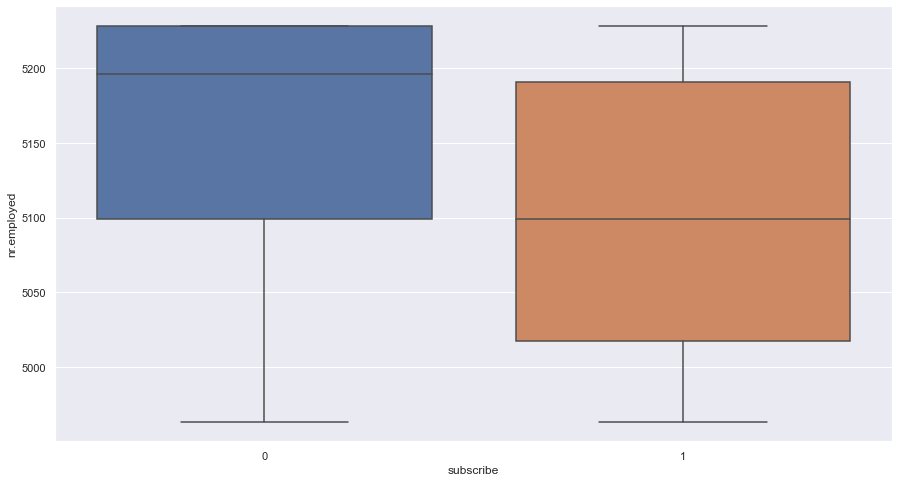

In [56]:
import matplotlib.pyplot as plt

for col in data.columns:
    if (data[col].dtype == 'float64'):
        sns.boxplot(x="subscribe", y=col, data=data)
        plt.show()

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       20000 non-null  int64  
 1   age             19798 non-null  float64
 2   job             19839 non-null  object 
 3   marital         19801 non-null  object 
 4   education       19830 non-null  object 
 5   default         19786 non-null  object 
 6   housing         19805 non-null  object 
 7   loan            19781 non-null  object 
 8   contact         19783 non-null  object 
 9   month           19801 non-null  object 
 10  day_of_week     19815 non-null  object 
 11  campaign        19797 non-null  float64
 12  pdays           19815 non-null  float64
 13  previous        19791 non-null  float64
 14  poutcome        19825 non-null  object 
 15  emp.var.rate    19835 non-null  float64
 16  cons.price.idx  19819 non-null  float64
 17  cons.conf.idx   19803 non-null 

In [58]:
# Fill na in all columns of data type object with unknown
for col in data.columns:
    if(data[col].dtype == 'object'):
        print(col)
        data[col] =  data[col].fillna('unknown')



client_id
age
job
marital
education
default
housing
loan
contact
month
day_of_week
campaign
pdays
previous
poutcome
emp.var.rate
cons.price.idx
cons.conf.idx
euribor3m
nr.employed
subscribe


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       20000 non-null  int64  
 1   age             19798 non-null  float64
 2   job             20000 non-null  object 
 3   marital         20000 non-null  object 
 4   education       20000 non-null  object 
 5   default         20000 non-null  object 
 6   housing         20000 non-null  object 
 7   loan            20000 non-null  object 
 8   contact         20000 non-null  object 
 9   month           20000 non-null  object 
 10  day_of_week     20000 non-null  object 
 11  campaign        19797 non-null  float64
 12  pdays           19815 non-null  float64
 13  previous        19791 non-null  float64
 14  poutcome        20000 non-null  object 
 15  emp.var.rate    19835 non-null  float64
 16  cons.price.idx  19819 non-null  float64
 17  cons.conf.idx   19803 non-null 

In [60]:
data.age.min()

17.0

In [61]:
data.age.max()

98.0

In [62]:
data.age = data.age.fillna(data.age.mean())

In [63]:
data['age-group'] =  np.where((data.age > 10.0) & (data.age <= 20.0), '10-20', 
                      np.where((data.age > 20.0) & (data.age <= 30.0), '20-30',  
                      np.where((data.age > 30.0) &  (data.age <= 40.0), '30-40', 
                       np.where((data.age > 40.0) &  (data.age <= 50.0), '40-50', 
                       np.where((data.age > 50.0) &  (data.age <= 60.0), '50-60', 
                       np.where((data.age > 60.0) &  (data.age <= 70.0), '60-70', 
                       np.where((data.age > 70.0) &  (data.age <= 80.0), '70-80',
                       np.where((data.age > 80.0) &  (data.age <= 90.0), '80-90', 
                       '90-100'))))))))

In [64]:
data.drop('age', inplace = True, axis = 1)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       20000 non-null  int64  
 1   job             20000 non-null  object 
 2   marital         20000 non-null  object 
 3   education       20000 non-null  object 
 4   default         20000 non-null  object 
 5   housing         20000 non-null  object 
 6   loan            20000 non-null  object 
 7   contact         20000 non-null  object 
 8   month           20000 non-null  object 
 9   day_of_week     20000 non-null  object 
 10  campaign        19797 non-null  float64
 11  pdays           19815 non-null  float64
 12  previous        19791 non-null  float64
 13  poutcome        20000 non-null  object 
 14  emp.var.rate    19835 non-null  float64
 15  cons.price.idx  19819 non-null  float64
 16  cons.conf.idx   19803 non-null  float64
 17  euribor3m       19796 non-null 

In [66]:
columns_to_drop = list()
for col in data.columns:
    if(data[col].dtype == 'object' and col != 'subscribe'):
        print(col)
        columns_to_drop.append(col)
        dummies = pd.get_dummies(data[col], prefix = col)
        data  = pd.concat([data, dummies] , axis = 1)

job
marital
education
default
housing
loan
contact
month
day_of_week
poutcome
age-group


In [67]:
data.drop(columns = columns_to_drop, axis = 1, inplace= True)
data.head()

,client_id,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,month_unknown,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_unknown,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,poutcome_unknown,age-group_10-20,age-group_20-30,age-group_30-40,age-group_40-50,age-group_50-60,age-group_60-70,age-group_70-80,age-group_80-90,age-group_90-100
0,29925,1.0,999.0,0.0,1.4,93.918,-42.7,4.968,5228.1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,37529,4.0,999.0,0.0,1.4,94.465,-41.8,4.960,5228.1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,2757,1.0,999.0,0.0,-1.8,92.893,-46.2,1.264,5099.1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,9642,1.0,999.0,0.0,-1.8,93.075,-47.1,1.453,5099.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,14183,1.0,999.0,0.0,1.1,93.994,-36.4,4.859,5191.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 76 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   client_id                      20000 non-null  int64  
 1   campaign                       19797 non-null  float64
 2   pdays                          19815 non-null  float64
 3   previous                       19791 non-null  float64
 4   emp.var.rate                   19835 non-null  float64
 5   cons.price.idx                 19819 non-null  float64
 6   cons.conf.idx                  19803 non-null  float64
 7   euribor3m                      19796 non-null  float64
 8   nr.employed                    19816 non-null  float64
 9   subscribe                      20000 non-null  int64  
 10  job_admin.                     20000 non-null  uint8  
 11  job_blue-collar                20000 non-null  uint8  
 12  job_entrepreneur               20000 non-null 

In [69]:
data.isna().sum()

client_id                          0
campaign                         203
pdays                            185
previous                         209
emp.var.rate                     165
cons.price.idx                   181
cons.conf.idx                    197
euribor3m                        204
nr.employed                      184
subscribe                          0
job_admin.                         0
job_blue-collar                    0
job_entrepreneur                   0
job_housemaid                      0
job_management                     0
job_retired                        0
job_self-employed                  0
job_services                       0
job_student                        0
job_technician                     0
job_unemployed                     0
job_unknown                        0
marital_divorced                   0
marital_married                    0
marital_single                     0
marital_unknown                    0
education_basic.4y                 0
e

In [70]:
data.campaign =  data.campaign.fillna(-9999)

In [71]:
data['campaign_missing'] = np.where(data.campaign == -9999, 1,0)

In [72]:
data.isna().sum()

client_id                          0
campaign                           0
pdays                            185
previous                         209
emp.var.rate                     165
cons.price.idx                   181
cons.conf.idx                    197
euribor3m                        204
nr.employed                      184
subscribe                          0
job_admin.                         0
job_blue-collar                    0
job_entrepreneur                   0
job_housemaid                      0
job_management                     0
job_retired                        0
job_self-employed                  0
job_services                       0
job_student                        0
job_technician                     0
job_unemployed                     0
job_unknown                        0
marital_divorced                   0
marital_married                    0
marital_single                     0
marital_unknown                    0
education_basic.4y                 0
e

In [73]:
data.pdays.nunique()

25

In [74]:
data.pdays =  data.pdays.fillna(-9999)
data['pdays_missing'] = np.where(data.pdays == -9999, 1,0)

In [75]:
data.previous.nunique()

7

In [76]:
data.previous =  data.previous.fillna(-9999)
data['previous_missing'] = np.where(data.previous == -9999, 1,0)

In [77]:
data['emp.var.rate'].nunique()

10

In [78]:
data['emp.var.rate'] =  data['emp.var.rate'].fillna(-9999)
data['emp.var.rate_missing'] = np.where(data['emp.var.rate'] == -9999, 1,0)

In [79]:
data['cons.price.idx'].nunique()

26

In [80]:
data['cons.price.idx'] =  data['cons.price.idx'].fillna(-9999)
data['cons.price.idx_missing'] = np.where(data['cons.price.idx'] == -9999, 1,0)

In [81]:
data['cons.conf.idx'].nunique()

26

In [82]:
data['cons.conf.idx'] =  data['cons.conf.idx'].fillna(-9999)
data['cons.conf.idx_missing'] = np.where(data['cons.conf.idx'] == -9999, 1,0)

In [83]:
data['euribor3m'].nunique()

300

In [84]:
data['euribor3m'] =  data['euribor3m'].fillna(-9999)
data['euribor3m_missing'] = np.where(data['euribor3m'] == -9999, 1,0)

In [85]:
data['nr.employed'].nunique()

11

In [86]:
data['nr.employed'] =  data['nr.employed'].fillna(-9999)
data['nr.employed_missing'] = np.where(data['nr.employed'] == -9999, 1,0)

In [87]:
data.isna().sum()

client_id                        0
campaign                         0
pdays                            0
previous                         0
emp.var.rate                     0
cons.price.idx                   0
cons.conf.idx                    0
euribor3m                        0
nr.employed                      0
subscribe                        0
job_admin.                       0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
job_unknown                      0
marital_divorced                 0
marital_married                  0
marital_single                   0
marital_unknown                  0
education_basic.4y               0
education_basic.6y               0
education_basic.9y  

In [88]:
data[data.subscribe == 1].shape[0]

2271

In [98]:
data[data.subscribe == 1].shape[0] / data.shape[0]

0.11355

In [89]:
data.to_csv('./Data/basetable.csv')

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X =  data.drop('subscribe', axis = 1) 
y = data.subscribe

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [93]:
X_train.to_csv('./Data/X_train.csv')

In [94]:
X_test.to_csv('./Data/X_test.csv')

In [95]:
y_train.to_csv('./Data/y_train.csv')

In [96]:
y_test.to_csv('./Data/y_test.csv')